In [14]:
from PIL import Image
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets, svm, linear_model
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

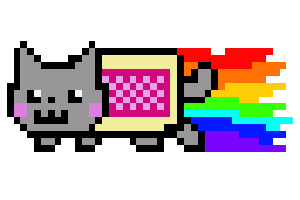

In [15]:
x = np.array(Image.open('img/mycat.png'))
Image.fromarray(x).resize((300,200), Image.NEAREST)

In [16]:
# 這邊要少一點不然後面會算很久 = =
# 顏色的 RGB 訊息 ， 不要帶透明度資訊
color_ =  list(set(tuple(x_) for x_ in x.reshape(-1,3)))

In [17]:
# 包成 dict 上 index 
# EX: (255, 205, 5): 0
color_dict = {color:i for i, color in enumerate(color_)}
color_dict

{(255, 205, 5): 0,
 (219, 127, 219): 1,
 (5, 26, 255): 2,
 (255, 5, 5): 3,
 (255, 113, 5): 4,
 (122, 5, 255): 5,
 (55, 255, 5): 6,
 (5, 255, 243): 7,
 (232, 162, 232): 8,
 (0, 0, 0): 9,
 (242, 238, 158): 10,
 (209, 8, 122): 11,
 (255, 255, 255): 12,
 (153, 150, 153): 13,
 (245, 245, 245): 14}

In [18]:
h, w = x.shape[:2]
X = np.mgrid[0:h, 0:w].reshape(2, -1).T
X = X.astype('float64')
y = np.array([color_dict[tuple(x)] for x in x.reshape(-1,3)])
# X size = (28*44 , 2)

In [19]:
# 調 + 多少會影響邊界連帶影響下面的參數跟訓練 
X = np.concatenate([X, X+[0.1,0.1], X+[0.1,-0.1], X+[-0.1,0.1], X+[-0.1,-0.1]])
y = np.concatenate([y,y,y,y,y])

In [94]:
def choseClf(index:int):
    if index == 0:
        return svm.NuSVC(nu = 0.0054, gamma = 1)
    if index == 1:
        return svm.SVC(gamma = 1)
    if index == 2:
        return svm.LinearSVR(max_iter=10000)

In [150]:
def caculate():
    X_mean = X.mean()
    X_std = X.std()/10
    X_mean = X.mean()
    X_std = X.std()/10
    return X_mean, X_std

In [38]:
def getGrid():
    x_min, y_min = X.min(axis=0)-0.5
    x_max, y_max = X.max(axis=0)+0.5
    grid  = np.mgrid[x_min:x_max:800j, y_min:y_max:800j]
    return grid

In [39]:
def drawSimple(i:int):
    clf = choseClf(i)
    clf.fit((X-caculate()[0])/ caculate()[1], y)
    Z = clf.predict((getGrid().reshape(2, -1).T-caculate()[0])/caculate()[1])
    plt.scatter(X[:,1], -X[:,0], c=y);
    return Z

In [40]:
def draw(Z):
    Z  = Z.reshape(getGrid().shape[1:])
    cm = LinearSegmentedColormap.from_list("cmm", np.array(color_)/255 )
    plt.pcolormesh(getGrid()[1], h-getGrid()[0], Z, cmap=cm, alpha=1,shading='auto');

In [41]:
def drawBound(Z):
    Z  = Z.reshape(getGrid().shape[1:])
    plt.contour(getGrid()[1], h-getGrid()[0], Z, colors='r', linestyles = '--' , levels=[-10,0,10])

In [42]:
def draw3D(Z):
    Z  = Z.reshape(getGrid().shape[1:])
    matplotlib.rcParams['figure.figsize']=(10,10)
    ax = plt.gca(projection='3d')
    ax.plot_wireframe(getGrid()[0], getGrid()[1], Z, alpha=0.2, rstride=30, cstride=30)
    ax.plot_surface(getGrid()[0], getGrid()[1], -Z, alpha=0.2)
    ax.scatter(X[:, 0], X[:, 1], y, c=y, s=30);
    ax.set_zlim3d(-50,25)
    ax.set_xlim3d(-25,10)
    ax.set_ylim3d(-20,30)
    ax.view_init(25, 25)

## 比較 NuSVC ， SVC ， LinearSVC

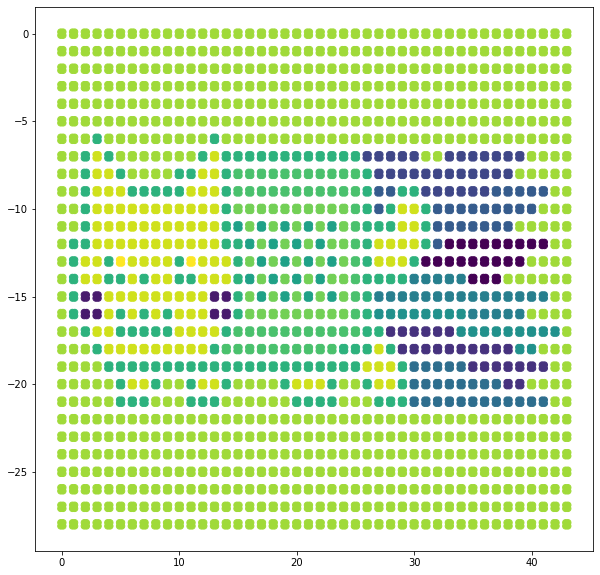

In [51]:
Z0 = drawSimple(0)

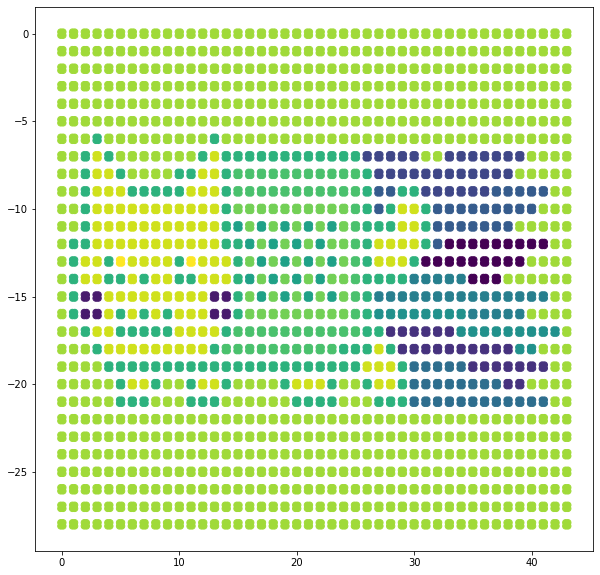

In [52]:
Z1 = drawSimple(1)

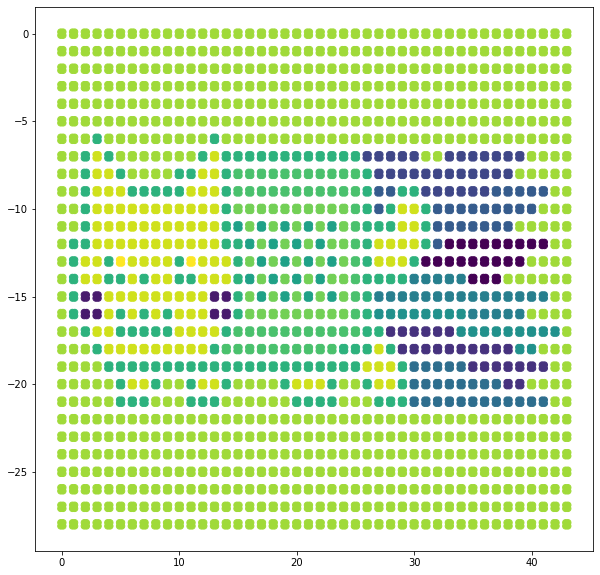

In [95]:
Z2 = drawSimple(2)

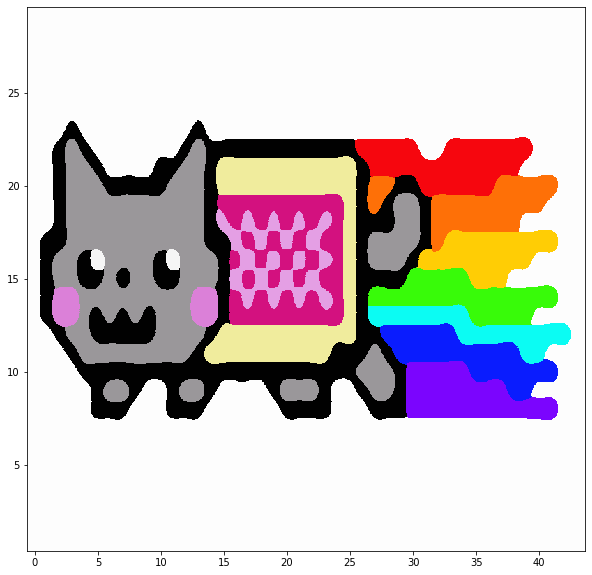

In [54]:
draw(Z0)

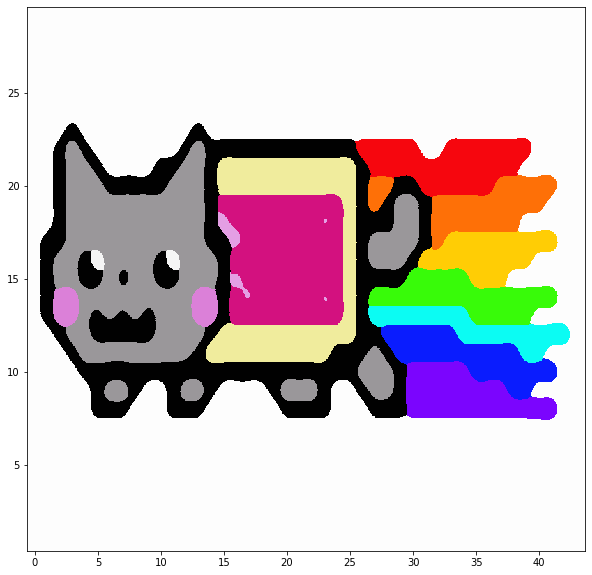

In [55]:
draw(Z1)

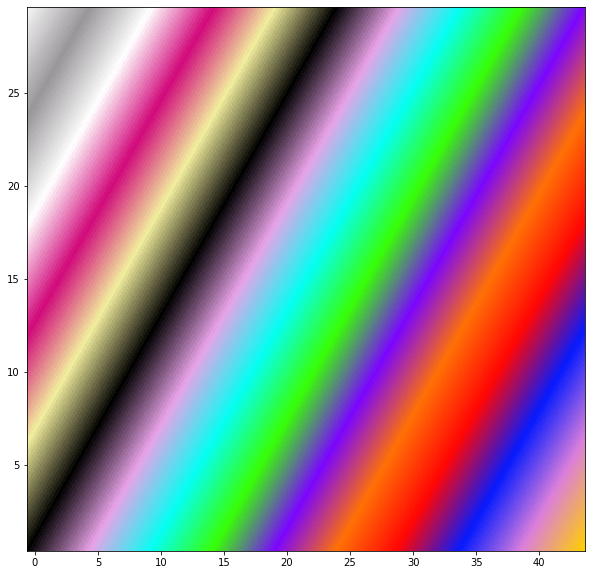

In [96]:
draw(Z2)

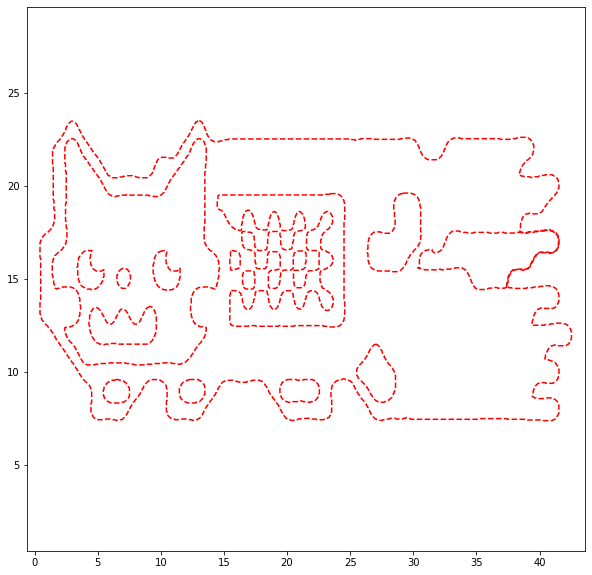

In [57]:
drawBound(Z0)

(640000,)

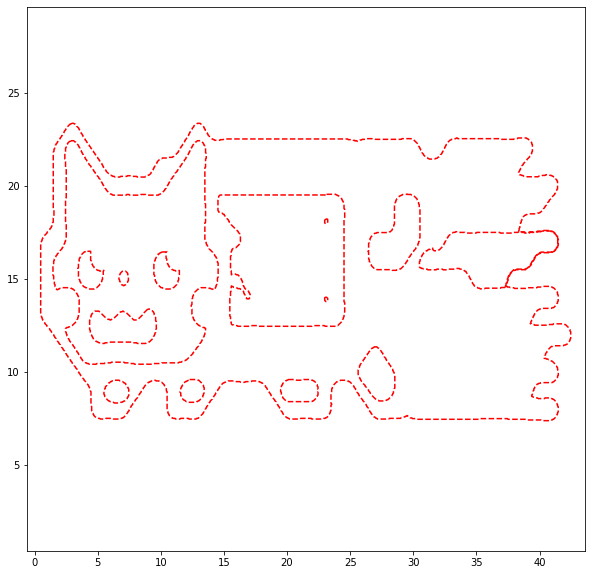

In [146]:
drawBound(Z1)

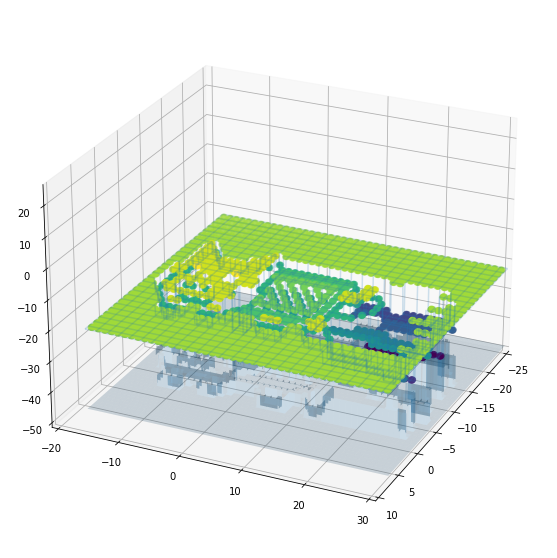

In [60]:
draw3D(Z0)

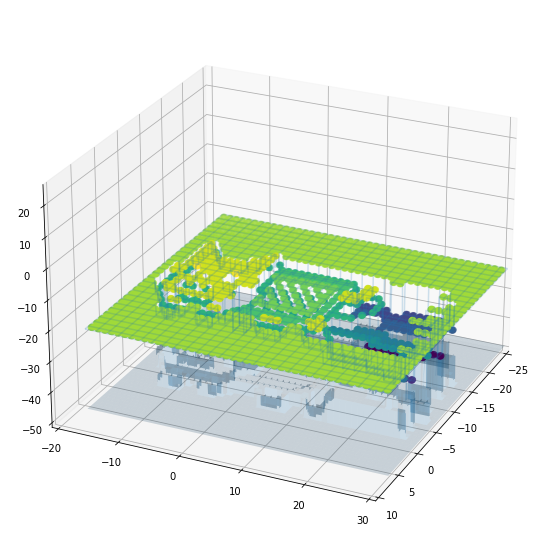

In [61]:
draw3D(Z1)

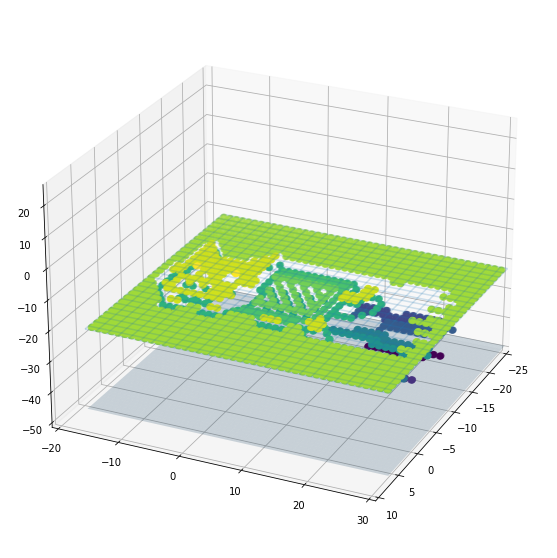

In [98]:
draw3D(Z2)